# EDA

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
# Importing the dataset
data = pd.read_csv("../DPEL/FILES/HousingPricesData.csv")
data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [47]:
# Removing Nulls
data = data.dropna()

In [48]:
# Data Description
data.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,920.000000,9.200000e+02,920.000000,920.00000,920.000000,920.000000
mean,462.625000,6.220654e+05,95.607609,3.56413,4.888652,52.363271
std,266.924298,5.389942e+05,56.849699,1.57103,0.053118,0.024054
min,1.000000,1.750000e+05,21.000000,1.00000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.000000,3.00000,4.855834,52.351925
50%,462.500000,4.670000e+05,83.000000,3.00000,4.886818,52.364499
75%,693.250000,7.000000e+05,113.000000,4.00000,4.922337,52.377545
max,924.000000,5.950000e+06,623.000000,14.00000,5.029122,52.423805


In [49]:
# Data Dimensions
data.shape

(920, 8)

Question 1

In [50]:
# Fetching the Address with the highest Area
for i in data.itertuples():
    if i.Area == max(data["Area"]):
        print(f"{i.Zip} - {i.Index}")

1016 AE - 305


Question 2

In [51]:
# Create a feature for Square Unit Price
data["SqUnitPrice"] = data["Price"]/data["Area"]
data

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat,SqUnitPrice
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,10703.125000
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,7916.666667
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,7798.165138
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,4531.250000
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,5217.391304
...,...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,6410.256410
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,4861.111111
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,6862.745098
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,5300.884956


Question 3

In [52]:
# Suggest 5 best properties in the price range 450000 to 1000000

# Initial Condition
Extracted_Data = []
for i in data.itertuples():
    if i.Price>=450000.0 and i.Price<=1000000.0:
        Extracted_Data.append(i)

# Setting Arbritrary Biases
Area_bias = 3
SqUnitPrice_bias = 2

# Calculating Bias Scores
Scores = []
for i in Extracted_Data:
    Score = (i.Area/1000)*Area_bias + (i.SqUnitPrice/1000)*SqUnitPrice_bias
    Scores.append([i.Address, Score])

# Sorting and Printing Top 5 Scores
Scores.sort(key=lambda x: x[1], reverse=True)
for i in range(5):
    print(f"{Scores[i][0]} - {Scores[i][1]}")

Zuideinde 387 D, Amsterdam - 22.656
Prins Hendrikkade 156 1, Amsterdam - 22.415379310344825
Keizersgracht 515 R, Amsterdam - 22.255
Prins Hendrikkade 156 3, Amsterdam - 22.24296551724138
Prins Hendrikkade 156 2, Amsterdam - 22.070551724137932


Question 3

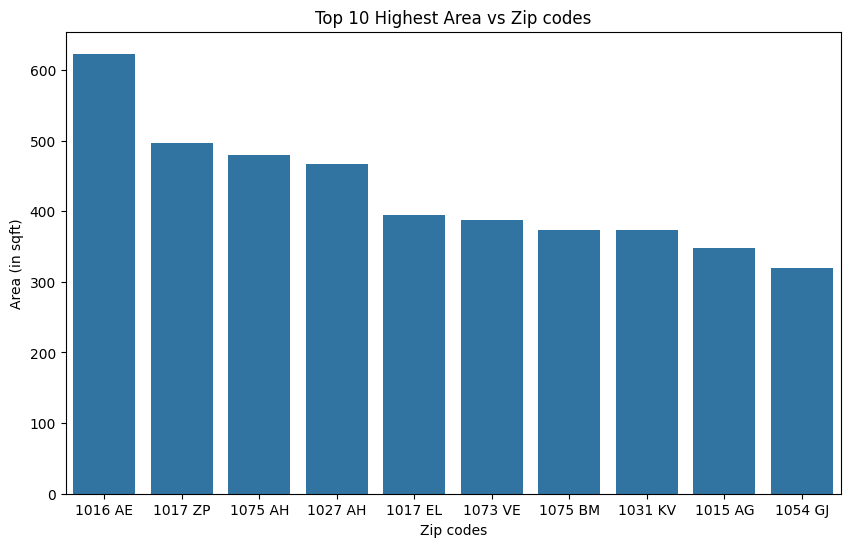

In [53]:
# Plot Top 10 Highest Area vs Zip codes 
Top10_Area = data.nlargest(10, 'Area')
plt.figure(figsize=(10,6))
sns.barplot(x='Zip', y='Area', data=Top10_Area)
plt.title('Top 10 Highest Area vs Zip codes')
plt.xlabel('Zip codes')
plt.ylabel('Area (in sqft)')
plt.show()

Question 4

In [54]:
# 